# Whatsapp Analysis

First we need to install the new packages we will use in this project

In [1]:
#!pip install regex
#!pip install emoji
#!pip install plotly.express
#!pip install wordcloud
#!git clone https://github.com/amueller/word_cloud.git
#%cd word_cloud

In [2]:
#Checking the working directory
#import os
#os.getcwd()

In [3]:
#%cd ..

DATA COLLECTION 


Now we can import the packages to Jupyter 

In [4]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import matplotlib.pyplot as plt
import datetime
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### 

In [5]:
def startsWithDateAndTime(s):
    pattern = '^\[([0-9]+)([\/-])([0-9]+)([\/-])([0-9]+)[,]? ([0-9]+):([0-9][0-9]):([0-9][0-9])[ ]?(AM|PM|am|pm)?\]'
    result = re.match(pattern, s)
    if result:
        return True
    return False

Quick test to see if the function is working for this format

In [6]:
startsWithDateAndTime("[2020-04-20 6:46:53] Lance Amstrong: If there was a god, I'd still have both nuts.")

True

Lets grab the authors in the file 

In [7]:
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Last Name
        '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return True
    return False

def getDataPoint(line):   
    splitLine = line.split('] ')
    dateTime = splitLine[0]
    if ',' in dateTime:
      date, time = dateTime.split(',') 
    else:
      date, time = dateTime.split(' ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = '/Users/laurentrisser/Desktop/dragons.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline()
    fp.readline()
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line: 
            break 
        line = line.strip()
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
          line= (line.encode('ascii', 'ignore')).decode("utf-8")
          if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
          else:
            messageBuffer.append(line)

def dateconv(date):
  year=''
  if '-' in date:
    year = date.split('-')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%Y-%m-%d").strftime("%Y-%m-%d")
    elif len(year) ==2:
      return datetime.datetime.strptime(date, "[%Y-%m-%d").strftime("%Y-%m-%d")
  elif '/' in date:
    year = date.split('/')[2]
    if len(year) == 4:
      return datetime.datetime.strptime(date, "[%Y/%m/%d").strftime("%Y-%m-%d")
    if len(year) ==2:
      return datetime.datetime.strptime(date, "[%Y/%m/%d").strftime("%Y-%m-%d")
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = df["Date"].apply(dateconv)
df["Date"] = pd.to_datetime(df["Date"])

DATA MANIPULATION

The block below will be fixing the dates

In [8]:
#Quick look at the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8357 entries, 0 to 8356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8357 non-null   datetime64[ns]
 1   Time     8357 non-null   object        
 2   Author   8337 non-null   object        
 3   Message  8357 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 261.3+ KB


In [9]:
#looking at the different Authors' names
df.Author.unique()

array(['Denis Weber', 'Gilles Jean Pierre', 'Fabien Cop',
       'Aurelien Pointereau', 'Rodrigue Voison', 'Didier Muckensturm',
       'Cyrille Millet Pfuch', 'Hervé Stratenmeyer', 'Laurent', 'Marc',
       'Eric Pally', 'Pierre', 'FX Laurent', 'Herv Dupont', None,
       'Hervé Dupont', 'Herv Stratenmeyer', 'Matthieu Liehn',
       'Alexandre Risser'], dtype=object)

In [10]:
#Replacing names with surnames
#df = df[df['Author'].apply(valid_user)]
df.loc[(df.Author == 'Denis Weber'), 'Author'] = 'Chris Froome'
df.loc[(df.Author == 'Gilles Jean Pierre'), 'Author'] = 'Egan Bernal' 
df.loc[(df.Author == 'Fabien Cop'), 'Author'] = 'Alberto Contador' 
df.loc[(df.Author == 'Aurelien Pointereau'), 'Author'] = 'Nairo Quintana' 
df.loc[(df.Author == 'Rodrigue Voison'), 'Author'] = 'Romain Bardet' 
df.loc[(df.Author == 'Didier Muckensturm'), 'Author'] = 'Vincenzo Nibali' 
df.loc[(df.Author == 'Cyrille Millet Pfuch'), 'Author'] = 'Peter Sagan' 
df.loc[(df.Author == 'Hervé Stratenmeyer'), 'Author'] = 'Emanuel Buchmann' 
df.loc[(df.Author == 'Laurent'), 'Author'] = 'Julian Alaphillipe' 
df.loc[(df.Author == 'Marc'), 'Author'] = 'Tony Gallopin' 
df.loc[(df.Author == 'Eric Pally'), 'Author'] = 'Thibaut Pinot' 
df.loc[(df.Author == 'Pierre'), 'Author'] = 'Tom Dumoulin' 
df.loc[(df.Author == 'FX Laurent'), 'Author'] = 'Fabio Aru' 
df.loc[(df.Author == 'Herv Dupont'), 'Author'] = 'Adam Yates' 
df.loc[(df.Author == 'Hervé Dupont'), 'Author'] = 'Adam Yates' 
df.loc[(df.Author == 'Herv Stratenmeyer'), 'Author'] = 'Warren Barguil' 
df.loc[(df.Author == 'Matthieu Liehn'), 'Author'] = 'Wout Van Aert' 
df.loc[(df.Author == 'Alexandre Risser'), 'Author'] = 'Bauke Mollema' 
#df = df[df['name'] != '<redacted>']
df['Author'].unique()


array(['Chris Froome', 'Egan Bernal', 'Alberto Contador',
       'Nairo Quintana', 'Romain Bardet', 'Vincenzo Nibali',
       'Peter Sagan', 'Emanuel Buchmann', 'Julian Alaphillipe',
       'Tony Gallopin', 'Thibaut Pinot', 'Tom Dumoulin', 'Fabio Aru',
       'Adam Yates', None, 'Warren Barguil', 'Wout Van Aert',
       'Bauke Mollema'], dtype=object)

In [11]:
#Dropping rows with NA value
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     8337 non-null   datetime64[ns]
 1   Time     8337 non-null   object        
 2   Author   8337 non-null   object        
 3   Message  8337 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 325.7+ KB


In [12]:
#Since we did not attach the media, once there is a media sent in the chat its creating the message 'image omitted'
#The script below is counting one media = +1 in the column media_messages
media_messages = df[df['Message'] == 'image omitted'].shape[0]
print(media_messages)

717


In [13]:
#Create a new column emoji and report the type of emoji in the message
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    flags = regex.findall(u'[\U0001F1E6-\U0001F1FF]', text) 

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [14]:
#Number total of em0ji
emojis = sum(df['emoji'].str.len())
print(emojis)

2818


In [15]:
#Number total of messages
total_messages = df.shape[0]
print(total_messages)

8337


In [16]:
#Create a colum urlcount and count +1 once there is a link shared.
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [17]:
#Sum up the number of links shared on the group
links = np.sum(df.urlcount)

In [18]:
#Summary of the data
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 8337
Media: 717
Emojis: 2818
Links: 229


In [19]:
media_messages_df = df[(df['Message'] == 'image omitted')|(df['Message'] == 'video omitted')]

In [20]:
sticker_messages_df = df[df['Message'] == 'sticker omitted']
sticker_messages_df

Date          Time            Author          Message emoji  \
3121 2020-03-22    9:23:04 AM  Alberto Contador  sticker omitted    []   
3933 2020-04-11   10:23:06 AM    Nairo Quintana  sticker omitted    []   

      urlcount  
3121         0  
3933         0

In [21]:
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(sticker_messages_df.index)

In [22]:
#This block will create new columns and add it to the current the dataframe
#Create a new column Letter_count
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
#Create a new column Word_count
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
#Create a new column for 1 row = 1 
messages_df["MessageCount"]=1
#Create a new column emoji count
messages_df["emojicount"]= df['emoji'].str.len()
#Create a new column ratio number of words per emoji
messages_df["ratio_word_emoji"]= messages_df['Word_Count']/messages_df['emojicount']
#Replace infinite value by 0
messages_df["ratio_word_emoji"].replace(np.inf, 0, inplace=True)

In [23]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7585 entries, 0 to 8356
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7585 non-null   datetime64[ns]
 1   Time              7585 non-null   object        
 2   Author            7585 non-null   object        
 3   Message           7585 non-null   object        
 4   emoji             7585 non-null   object        
 5   urlcount          7585 non-null   int64         
 6   Letter_Count      7585 non-null   int64         
 7   Word_Count        7585 non-null   int64         
 8   MessageCount      7585 non-null   int64         
 9   emojicount        7585 non-null   int64         
 10  ratio_word_emoji  7585 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 711.1+ KB


In [24]:
messages_df.head(2)

Date         Time        Author  \
0 2019-10-15   1:38:00 PM  Chris Froome   
1 2019-10-15   1:38:44 PM   Egan Bernal   

                                             Message emoji  urlcount  \
0                       Jean pierre l'oeuil du Tigre    []         0   
1  Moi je me suis arrêté aux garage en vélo noir ...    []         0   

   Letter_Count  Word_Count  MessageCount  emojicount  ratio_word_emoji  
0            28           5             1           0               0.0  
1            50          11             1           0               0.0

In [25]:
#Exporting the dataframe into a csv file
messages_df.to_csv(r'/Users/laurentrisser/Desktop/data.csv', index = False)

In [26]:
# Creates a list of unique Authors 
l = messages_df.Author.unique()

for i in range(len(l)):
    
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  #sticker conists of stickers messages
  stickers = sticker_messages_df[sticker_messages_df['Author'] == l[i]].shape[0]
  print('Sticker Messages Sent', stickers)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)
  ratio = (np.average(req_df['ratio_word_emoji']))
  print('Avg Emoji', ratio)
  print()

Stats of Chris Froome -
Messages Sent 1194
Words per message 8.108877721943049
Media Messages Sent 50
Sticker Messages Sent 0
Emojis Sent 357
Links Sent 9
Avg Emoji 1.1970965940815188

Stats of Egan Bernal -
Messages Sent 1160
Words per message 10.14051724137931
Media Messages Sent 176
Sticker Messages Sent 0
Emojis Sent 655
Links Sent 6
Avg Emoji 1.6167775136740654

Stats of Alberto Contador -
Messages Sent 428
Words per message 7.168224299065421
Media Messages Sent 19
Sticker Messages Sent 1
Emojis Sent 196
Links Sent 1
Avg Emoji 2.916277258566978

Stats of Nairo Quintana -
Messages Sent 917
Words per message 8.223555070883314
Media Messages Sent 117
Sticker Messages Sent 1
Emojis Sent 257
Links Sent 117
Avg Emoji 1.9231188658669576

Stats of Romain Bardet -
Messages Sent 195
Words per message 15.153846153846153
Media Messages Sent 16
Sticker Messages Sent 0
Emojis Sent 64
Links Sent 16
Avg Emoji 3.405982905982906

Stats of Vincenzo Nibali -
Messages Sent 1456
Words per message 5.437

In [27]:
#Checking the number of unique emoji
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

143


In [28]:
l = messages_df.Author.unique()

for i in range(len(l)):
    df_diversity = messages_df[messages_df['Author']== l[i]]
    print(f'Emoji Diversity of {l[i]}')
    list_diversity = list(set([a for b in df_diversity.emoji for a in b]))
    total_diversity = len(list_diversity)
    print(total_diversity)

Emoji Diversity of Chris Froome
28
Emoji Diversity of Egan Bernal
19
Emoji Diversity of Alberto Contador
44
Emoji Diversity of Nairo Quintana
40
Emoji Diversity of Romain Bardet
33
Emoji Diversity of Vincenzo Nibali
43
Emoji Diversity of Emanuel Buchmann
8
Emoji Diversity of Julian Alaphillipe
20
Emoji Diversity of Peter Sagan
25
Emoji Diversity of Tony Gallopin
21
Emoji Diversity of Thibaut Pinot
7
Emoji Diversity of Tom Dumoulin
7
Emoji Diversity of Fabio Aru
0
Emoji Diversity of Adam Yates
15
Emoji Diversity of Wout Van Aert
0
Emoji Diversity of Bauke Mollema
7


In [29]:
#List of all the emojis used with the count
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('😂', 817), ('😁', 290), ('😄', 209), ('👍🏻', 182), ('😉', 163), ('👍', 130), ('😜', 87), ('😅', 80), ('🤣', 75), ('🤔', 62), ('😀', 54), ('😝', 48), ('😱', 40), ('🤪', 33), ('😆', 32), ('😃', 29), ('🍾', 23), ('😊', 17), ('😭', 16), ('💪', 16), ('😎', 14), ('😡', 14), ('👌', 14), ('😍', 12), ('❄', 12), ('😩', 12), ('🙄', 10), ('🍺', 10), ('🍻', 10), ('☹️', 10), ('😢', 10), ('😯', 9), ('☃', 9), ('👍🏼', 9), ('🚴\u200d♂️', 9), ('😒', 8), ('😤', 8), ('😋', 7), ('🥂', 7), ('😓', 6), ('😙', 6), ('🙃', 6), ('😬', 6), ('🧐', 6), ('🚴', 6), ('😷', 5), ('🚲', 5), ('💶', 5), ('🏃🏽', 4), ('😛', 4), ('☺', 4), ('🍌', 4), ('🙂', 4), ('🤗', 4), ('🥵', 4), ('🤮', 4), ('🤫', 4), ('🥨', 4), ('🍷', 4), ('😳', 4), ('🤥', 3), ('😨', 3), ('☁️', 3), ('😰', 3), ('🤞', 3), ('⛄', 3), ('😘', 3), ('🤢', 3), ('🤘', 3), ('🤓', 2), ('🤷🏻\u200d♂', 2), ('🤒', 2), ('😮', 2), ('⛷️', 2), ('💪🏻', 2), ('🌧', 2), ('🇨🇵', 2), ('🎁', 2), ('🎄', 2), ('😈', 2), ('🙌', 2), ('🦵', 2), ('🐌', 2), ('😵', 2), ('🥳', 2), ('☔', 2), ('🏍', 2), ('🍕', 2), ('👨\u200d💻', 2), ('😏', 2), ('🤴🏻', 1), ('✈️', 1), ('😟', 1),

In [30]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])

In [31]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label',title='Frequency of Emoji')
fig.show()

In [32]:
# Creates a list of unique Authors
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for Chris Froome


Emoji Distribution for Egan Bernal


Emoji Distribution for Alberto Contador


Emoji Distribution for Nairo Quintana


Emoji Distribution for Romain Bardet


Emoji Distribution for Vincenzo Nibali


Emoji Distribution for Emanuel Buchmann


Emoji Distribution for Julian Alaphillipe


Emoji Distribution for Peter Sagan


Emoji Distribution for Tony Gallopin


Emoji Distribution for Thibaut Pinot


Emoji Distribution for Tom Dumoulin


Emoji Distribution for Fabio Aru


Emoji Distribution for Adam Yates


Emoji Distribution for Wout Van Aert


Emoji Distribution for Bauke Mollema


In [33]:
# Creates a list of unique Authors
l = messages_df.Author.unique()
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    total_emojis_list = list([a for b in dummy_df.emoji for a in b])
    emoji_dict = dict(Counter(total_emojis_list))
    emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
    print(total_emojis_list)

['😉', '😁', '😁', '😁', '😁', '😉', '😁', '😁', '☁️', '☁️', '☁️', '😁', '😁', '😁', '😉', '😁', '😁', '😁', '😉', '👍', '😁', '😉', '😁', '😉', '😁', '😉', '😁', '😉', '😉', '😁', '😉', '😁', '😃', '😁', '😁', '😁', '👍🏻', '😁', '🐒', '😉', '😉', '🌧', '🌧', '🇨🇵', '🇨🇵', '😀', '😀', '😀', '😀', '😀', '😀', '😉', '😉', '😀', '😀', '😉', '😀', '😀', '😀', '😀', '😀', '😀', '😃', '👍🏻', '👍🏻', '😀', '😀', '😉', '😉', '😀', '😀', '👍', '😀', '😉', '😀', '😀', '😀', '😉', '😀', '❄', '⛄', '⛄', '😉', '😉', '😉', '😉', '⛄', '❄', '👍', '😁', '😁', '😁', '👍', '😁', '😁', '😁', '😁', '👍', '😉', '😉', '😁', '🐌', '🐢', '😉', '😁', '😁', '😁', '😉', '😁', '😁', '😁', '😁', '😉', '👍🏻', '👍🏻', '😁', '😁', '😉', '😃', '😃', '😃', '😀', '😀', '👍🏻', '😀', '😉', '😉', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😁', '😉', '😀', '😁', '👍', '😀', '👍', '😉', '😁', '👍🏻', '👍', '👍', '👍', '👍', '👍', '😁', '😁', '🤔', '😎', '😎', '😉', '😉', '💶', '💶', '💶', '💶', '💶', '👍🏻', '👍🏻', '😉', '👍🏻', '😁', '😉', '😁', '😁', '😁', '😁', '👍🏻', '😁', '😁', '🤢', '🤮', '🤮', '😉', '😄', '😄', '😄', '😃', '😃', '👍🏻', '👍🏻', '👍🏻', '🤔', '😃', 

Text(0, 0.5, 'Date')

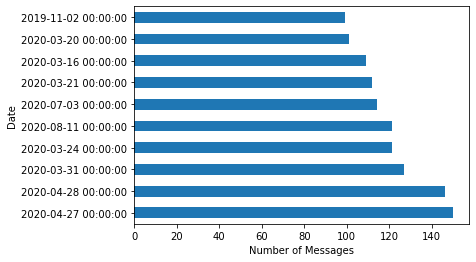

In [34]:
messages_df['Date'].value_counts().head(10).plot.barh()
plt.xlabel('Number of Messages')
plt.ylabel('Date')

In [35]:
def dayofweek(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(dayofweek)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,1600]
    )),
  showlegend=False
)
fig.show()

In [36]:
def dayofweek(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df_emojicount =pd.DataFrame(messages_df["emojicount"])
day_df_emojicount['day_of_date'] = messages_df['Date'].dt.weekday
day_df_emojicount['day_of_date'] = day_df_emojicount["day_of_date"].apply(dayofweek)
day_df_emojicount["messagecount"] = 1
day = day_df_emojicount.groupby("day_of_date").sum()
day.reset_index(inplace=True)

fig = px.line_polar(day, r='emojicount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,700]
    )),
  showlegend=False
)
fig.show()

In [38]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.show()

In [39]:
df['Date'] = pd.to_datetime(messages_df['Date'])
gr = df.groupby(pd.Grouper(key='Date',freq='W'))
for name, group in gr:
    print(' ', name)
    if len(group) > 0:
        print(group)

  2019-10-20 00:00:00
          Date         Time            Author  \
0   2019-10-15   1:38:00 PM      Chris Froome   
1   2019-10-15   1:38:44 PM       Egan Bernal   
2   2019-10-15   1:38:54 PM      Chris Froome   
3   2019-10-15   1:40:20 PM  Alberto Contador   
4   2019-10-15   1:41:54 PM       Egan Bernal   
..         ...          ...               ...   
147 2019-10-20   2:21:12 PM  Alberto Contador   
148 2019-10-20   2:22:17 PM    Nairo Quintana   
149 2019-10-20   2:22:49 PM  Alberto Contador   
150 2019-10-20   2:24:36 PM      Chris Froome   
151 2019-10-20   2:36:33 PM       Peter Sagan   

                                               Message      emoji  urlcount  
0                         Jean pierre l'oeuil du Tigre         []         0  
1    Moi je me suis arrêté aux garage en vélo noir ...         []         0  
2          Pff il n'y a que fabien pour voir le ridley         []         0  
3        Non mais les p'tits culs je les ai vu aussi 🤓        [🤓]         0  

[366 rows x 6 columns]
  2020-04-12 00:00:00
           Date          Time              Author  \
3846 2020-04-06    6:13:31 AM         Egan Bernal   
3847 2020-04-06    6:14:16 AM         Egan Bernal   
3848 2020-04-06    6:18:28 AM       Thibaut Pinot   
3850 2020-04-06    6:35:02 AM         Peter Sagan   
3851 2020-04-06    6:35:26 AM       Thibaut Pinot   
...         ...           ...                 ...   
3969 2020-04-12   10:31:30 AM         Egan Bernal   
3970 2020-04-12   12:34:13 PM  Julian Alaphillipe   
3971 2020-04-12   12:34:41 PM  Julian Alaphillipe   
3972 2020-04-12    4:35:46 PM      Nairo Quintana   
3973 2020-04-12    4:38:51 PM      Nairo Quintana   

                                                Message   emoji  urlcount  
3846  https://www.facebook.com/1578811220/posts/1021...      []         1  
3847  Vous allez rire et vous êtes tous immunisés .....      []         0  
3848                               Nickel 👍  Merci jp       [👍]         0  
3850          

In [40]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="Word_Count", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "yellow","goldenrod", "magenta"],
             title="Number of words per Author"
            )

fig.show()

In [41]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "yellow","goldenrod", "magenta"],
             title="Number of messages per Author"
            )
fig.show()

In [42]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="emojicount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "yellow","goldenrod", "magenta"],
             title="Emoji Count per Author"
            )

fig.show()

In [43]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="urlcount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "yellow","goldenrod", "magenta"],
             title="URL Count per Author"
            )

fig.show()

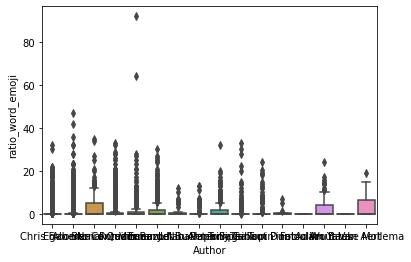

In [44]:
ax = sns.boxplot(x="Author", y="ratio_word_emoji", data=messages_df)


In [45]:
messages_df.iloc[messages_df['Word_Count'].argmax()]

Date                                              2020-01-02 00:00:00
Time                                                       5:10:57 PM
Author                                                   Tom Dumoulin
Message             Dis, papa, c’est quoi, un Alsacien? Ce n'est p...
emoji                                                              []
urlcount                                                            0
Letter_Count                                                     2426
Word_Count                                                        427
MessageCount                                                        1
emojicount                                                          0
ratio_word_emoji                                                    0
Name: 1468, dtype: object

Text(0, 0.5, 'Frequency')

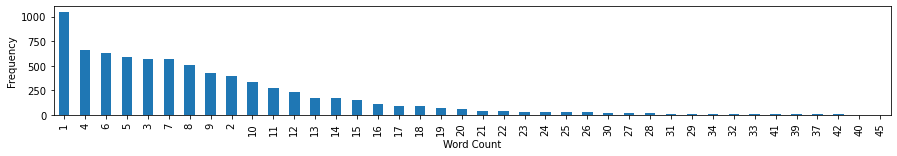

In [46]:
plt.figure(figsize=(15, 2)) # To ensure that the bar plot fits in the output cell of a Jupyter notebook
word_count_value_counts = messages_df['Word_Count'].value_counts()
top_40_word_count_value_counts = word_count_value_counts.head(40)
top_40_word_count_value_counts.plot.bar()
plt.xlabel('Word Count')
plt.ylabel('Frequency')

In [47]:
# Import packages
import numpy as np
from PIL import Image
# Import image to np.array
mask = np.array(Image.open('mask.png'))

In [48]:
text = " ".join(review for review in df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 345625 words in all the messages.


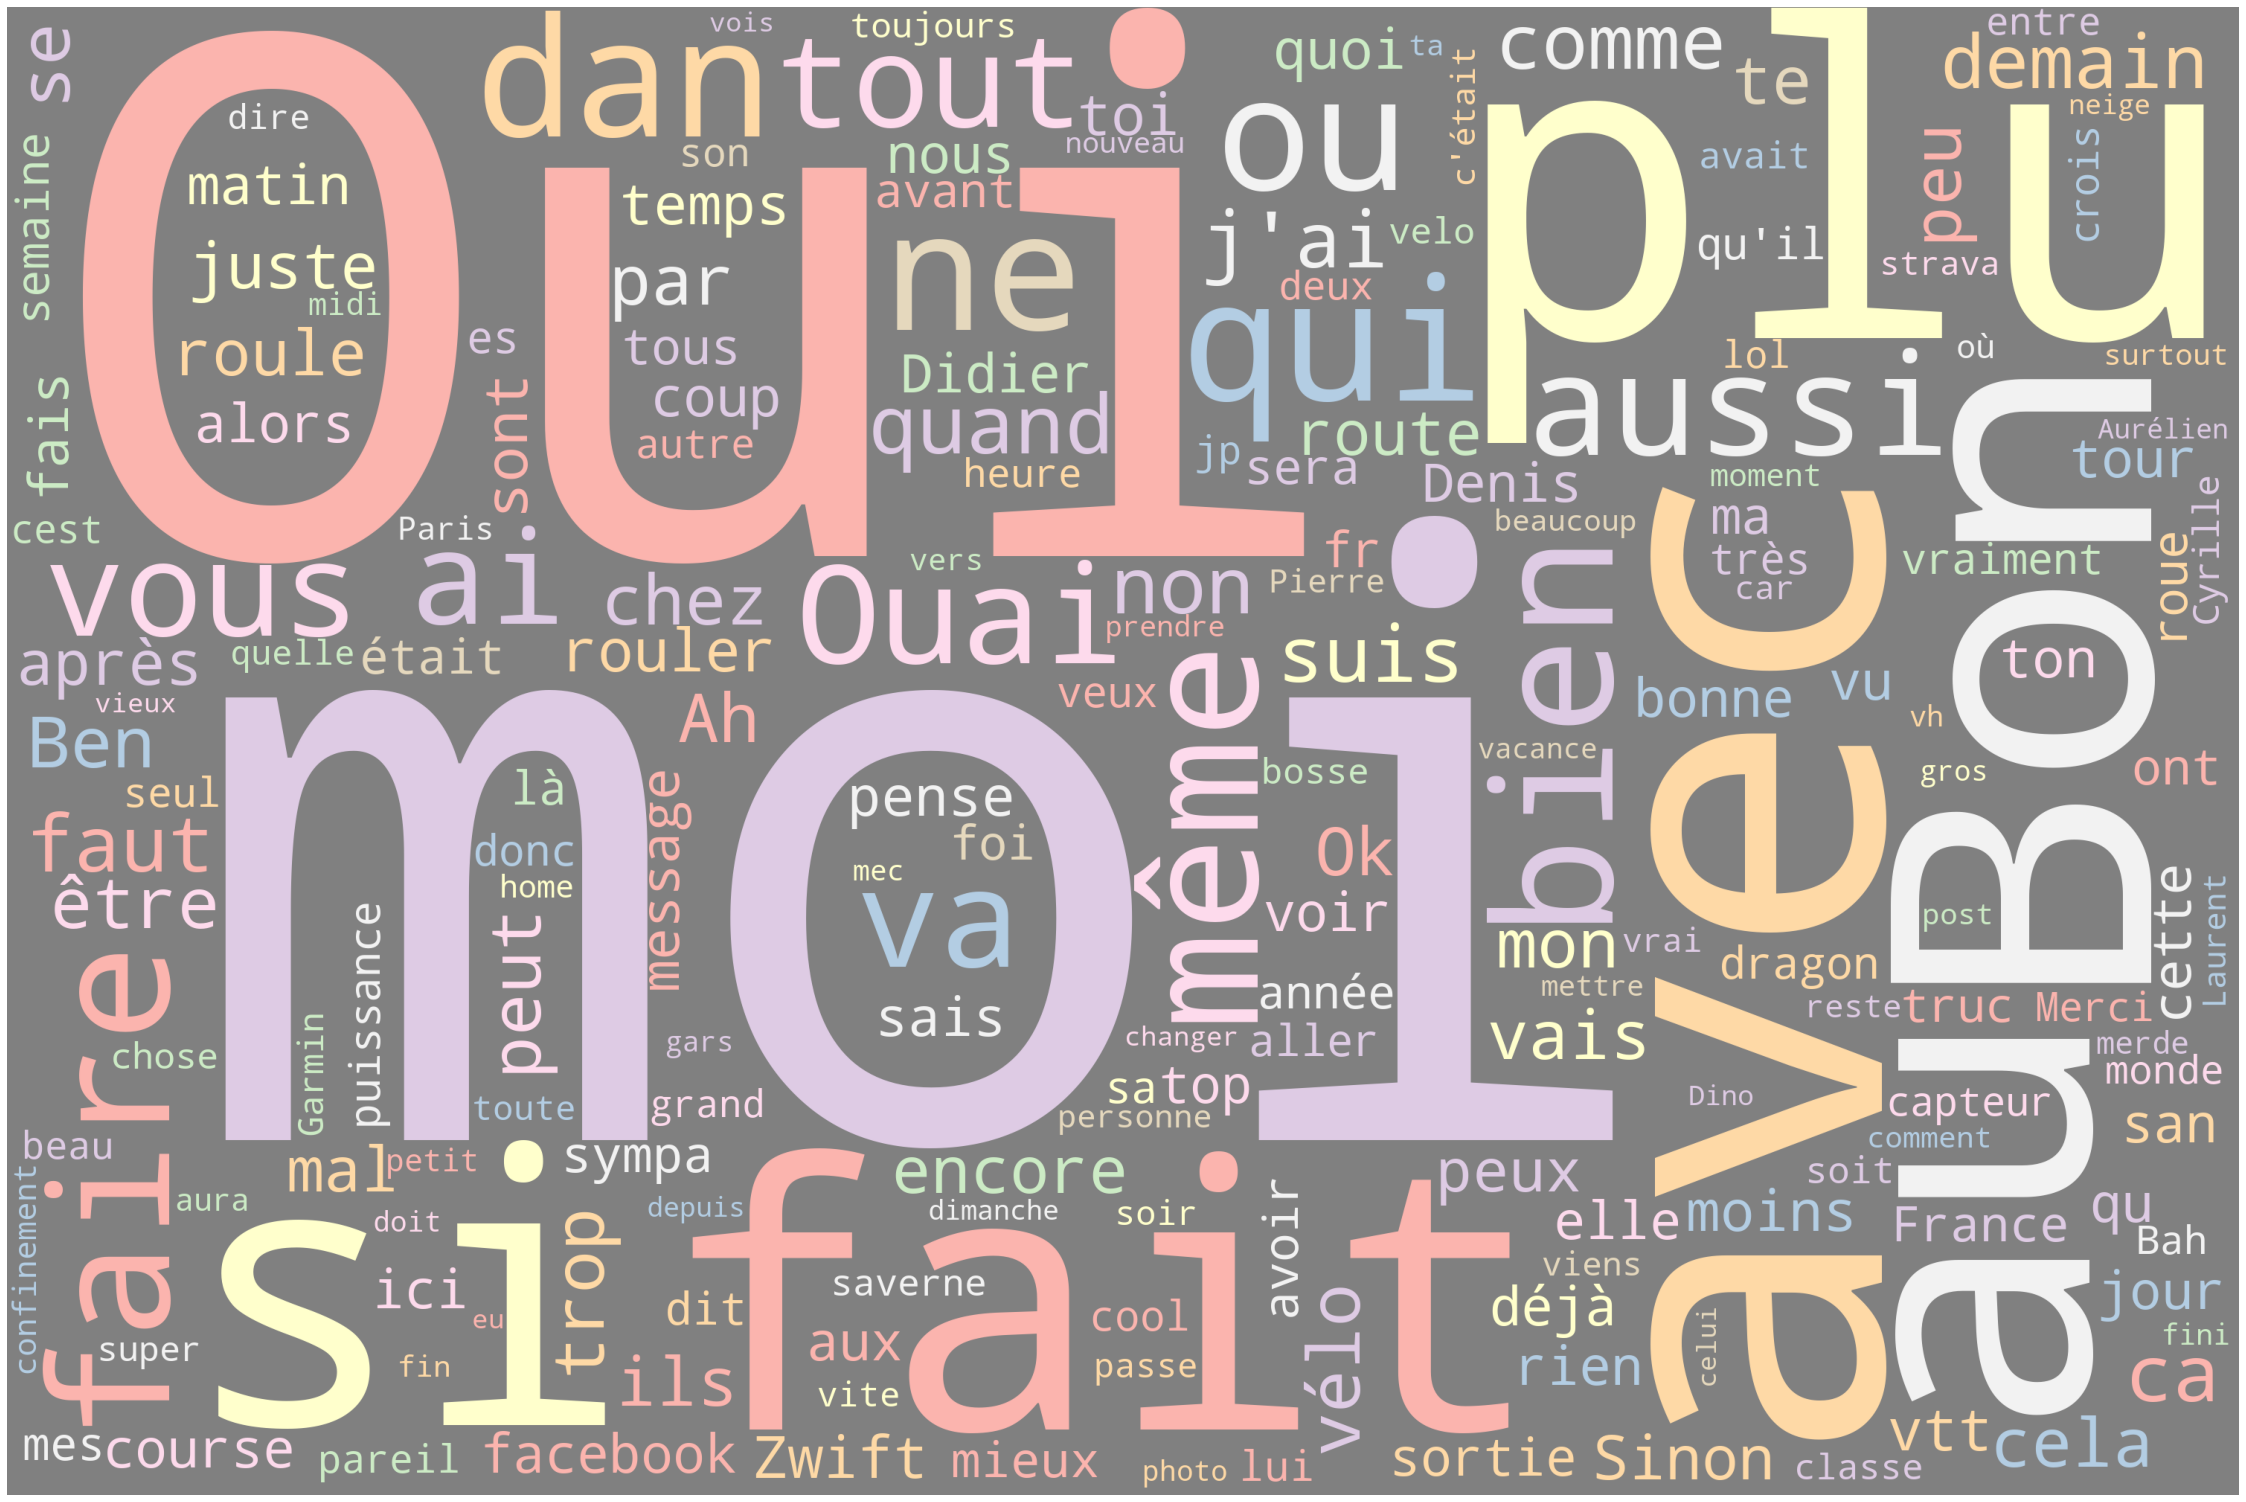

In [49]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
STOPWORDS.update(['video','deleted',"c'est",'image','omitted','le', 'la','de','en','je','tu','et','pa','un','des','i','ça','les','il', 'pas','est','pour','que','c/est', 'sur', 'une', 'mai','du', 'mais','https','ce'])

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='grey', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [50]:
# initializing the string and the word
word = "moi"
## splitting the string at space
words = text.split()
## initializing count variable to 0
count = 0
## iterating over the list
for w in words:
   ## checking the match of the words
   if w == word:
      ## incrementint count on match
      count += 1
## printing the count
print(count)

214


In [51]:
# initializing the string and the word
word = "bière"
## splitting the string at space
words = text.split()
## initializing count variable to 0
count = 0
## iterating over the list
for w in words:
   ## checking the match of the words
   if w == word:
      ## incrementint count on match
      count += 1
## printing the count
print(count)

17


# FUTURE WORK 

overlay the polar chart 

sentiment analysis